<a href="https://colab.research.google.com/github/Redcoder815/Machine_Learning/blob/main/KMeansCLustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

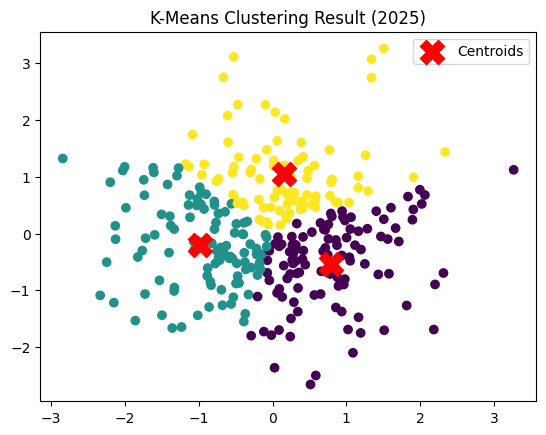

In [21]:
# Step-by-Step Explanation The algorithm follows an iterative process to minimize the Within-Cluster Sum of Squares (WCSS), also known as variance. Initialization: Select the number of clusters \(K\) and randomly initialize \(K\) centroids (center points) in the feature space.Assignment Step: For each data point, calculate its distance (usually Euclidean distance) to all centroids. Assign each point to the cluster of the nearest centroid.Update Step: Recompute the position of each centroid by taking the mean (average) of all data points currently assigned to that cluster.Repeat: Repeat the assignment and update steps until a stopping condition is met, such as centroids no longer moving, cluster assignments stabilizing, or reaching a maximum number of iterations.

import numpy as np
import matplotlib.pyplot as plt

import ipdb

class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None

    def _euclidean_distance(self, p1, p2):
        # Calculate straight-line distance between two points
        return np.sqrt(np.sum((p1 - p2)**2))

    def fit(self, X):
        # 1. Initialize centroids by picking k random points from the dataset
        random_indices = np.random.choice(X.shape[0], self.k, replace=False)
        self.centroids = X[random_indices]
        # ipdb.set_trace()

        for _ in range(self.max_iters):
            # 2. Assignment Step
            clusters = [[] for _ in range(self.k)]
            for point in X:
                # Find index of closest centroid
                distances = [self._euclidean_distance(point, c) for c in self.centroids]
                closest_idx = np.argmin(distances)
                # ipdb.set_trace()
                clusters[closest_idx].append(point)

            # 3. Update Step
            prev_centroids = self.centroids.copy()
            for idx, cluster in enumerate(clusters):
                if cluster: # Ensure cluster is not empty
                    # ipdb.set_trace()
                    self.centroids[idx] = np.mean(cluster, axis=0)

            # 4. Check for convergence (if centroids didn't move)
            if np.all(prev_centroids == self.centroids):
                break

        return self.centroids # This method now returns centroids

    def predict(self, X):
        # Assign new points to the nearest learned centroid
        predictions = []
        for point in X:
            distances = [self._euclidean_distance(point, c) for c in self.centroids]
            predictions.append(np.argmin(distances))
        return np.array(predictions)


X = np.random.randn(300, 2)  # Generate random 2D points
model = KMeans(k=3)
model.fit(X) # Fit the model to find centroids
labels = model.predict(X) # Get the cluster labels for each point in X

plt.scatter(X[:, 0], X[:, 1], c = labels, cmap='viridis') # Removed division by 255 as labels are indices
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering Result (2025)")
plt.legend()
plt.show()